<a href="https://colab.research.google.com/github/therealfortune/tensorflow-fortune/blob/master/Cats_v_Dog(OneDataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2021-12-17 22:15:40--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  85.6MB/s    in 0.8s    

2021-12-17 22:15:41 (85.6 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = "./cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

local_zip = "./cats-and-dogs_zip.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/content")

zip_ref.close()

In [ ]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [ ]:
try:
  os.mkdir("cats-v-dogs")
  os.mkdir("cats-v-dogs/training")
  os.mkdir('cats-v-dogs/testing')
  os.mkdir("cats-v-dogs/training/Dog")
  os.mkdir("cats-v-dogs/training/Cat")
  os.mkdir("cats-v-dogs/testing/Dog")
  os.mkdir("cats-v-dogs/testing/Cat")
except:
  pass

In [ ]:
print(len(os.listdir("cats-and-dogs/PetImages/cats")))
print(len(os.listdir("cats-and-dogs/PetImages/dogs")))

1000
1000


SPLITTING THE DATA INTO TRAINING AND TEST SET

In [ ]:
# Function that splits Image Data into training and test set
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  images = os.listdir(SOURCE)
  imgNo = len(images)

  trainingNo = int(SPLIT_SIZE * imgNo)
  testingNo = imgNo - trainingNo

  allImages = random.sample(images, imgNo)

  trainingImgs = allImages[:trainingNo]
  testingImgs = allImages[trainingNo:]

  for f in trainingImgs:
    if (len(f)>0):
      copyfile(SOURCE+f, TRAINING+f)
      
  for n in testingImgs:
    if (len(n)>0):
      copyfile(SOURCE+n, TESTING+n)

CAT_SOURCE_DIR = "cats-and-dogs/PetImages/cats/"
CAT_TRAINING_DIR = "cats-v-dogs/training/Cat/"
CAT_TESTING_DIR = "cats-v-dogs/testing/Cat/"
DOG_SOURCE_DIR = "cats-and-dogs/PetImages/dogs/"
DOG_TRAINING_DIR = "cats-v-dogs/training/Dog/"
DOG_TESTING_DIR = "cats-v-dogs/testing/Dog/"

# Splitting of data
split_size = 0.9
split_data(CAT_SOURCE_DIR, CAT_TRAINING_DIR, CAT_TESTING_DIR, split_size)
split_data(DOG_SOURCE_DIR, DOG_TRAINING_DIR, DOG_TESTING_DIR, split_size)

In [ ]:
print(len(os.listdir("cats-v-dogs/training/Dog/")))

900


TRAINING THE MODEL

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(300,300,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

SUMMARY OF THE MODEL

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 149, 149, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 35, 35, 64)      

COMPILING THE MODEL

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics=['acc'])

In [ ]:
TRAINING_DIR = "cats-v-dogs/training"
train_detagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range = 0.2,
    fill_mode='nearest',
    rescale=1./255
)

train_generator = train_detagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=10,
    target_size=(300,300),
    class_mode='binary',
)

VALIDATION_DIR = "cats-v-dogs/testing"

validation_detagen = ImageDataGenerator(
    rotation_range = 0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    rescale=1./255
)

validation_generator = validation_detagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=10,
    target_size=(300,300),
    class_mode='binary'
)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=25,
    verbose=1,
    validation_data=validation_generator
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/25
180/180 [==============================] - 55s 295ms/step - loss: 0.7740 - acc: 0.4978 - val_loss: 0.6902 - val_acc: 0.5550
Epoch 2/25
180/180 [==============================] - 53s 294ms/step - loss: 0.6934 - acc: 0.5328 - val_loss: 0.6730 - val_acc: 0.5600
Epoch 3/25
180/180 [==============================] - 53s 295ms/step - loss: 0.7040 - acc: 0.5817 - val_loss: 0.6444 - val_acc: 0.6200
Epoch 4/25
180/180 [==============================] - 53s 294ms/step - loss: 0.6735 - acc: 0.6072 - val_loss: 0.6134 - val_acc: 0.6850
Epoch 5/25
180/180 [==============================] - 53s 295ms/step - loss: 0.6604 - acc: 0.6294 - val_loss: 0.5930 - val_acc: 0.7000
Epoch 6/25
180/180 [==============================] - 53s 293ms/step - loss: 0.6474 - acc: 0.6450 - val_loss: 0.6661 - val_acc: 0.6150
Epoch 7/25
180/180 [==============================] - 53s 295ms/step - loss: 0.6651 - acc: 0.6511 - val_loss: 0.6406 - val_acc: 0.6150
Epoch 8/25
180/180 [==============================] - 5

Text(0.5, 1.0, 'Training and validation loss')

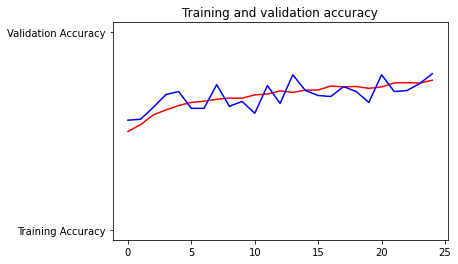

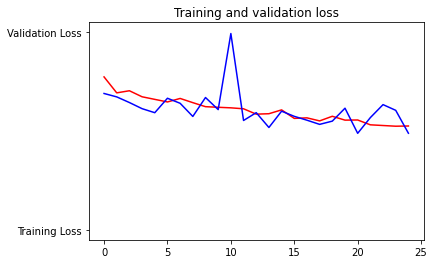

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data
# sets for each training epoch
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

# Text(0.5, 1.0, 'Training and validation loss')